In [1]:
%matplotlib inline

import evaluate as tp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

No module named basemap

    sudo apt-get install python-basemap
    or:
    conda install basemap

No module named basemap
No module named control


please install:
    pip install control



In [2]:
df_log = tp.get_data_from_log()

Data was analyzed from file /home/student/Documents/github/dronecourse-293330/tp_eval/../build_posix_sitl_dronecourse/tmp/rootfs/fs/microsd/log/sess001/log001.ulg




In [3]:
for i in list(df_log):
    print i

timestamp
t_battery_status_0__f_cell_count
t_battery_status_0__f_connected
t_battery_status_0__f_current_a
t_battery_status_0__f_current_filtered_a
t_battery_status_0__f_discharged_mah
t_battery_status_0__f_remaining
t_battery_status_0__f_scale
t_battery_status_0__f_voltage_filtered_v
t_battery_status_0__f_voltage_v
t_battery_status_0__f_warning
t_vehicle_status_0__f_arming_state
t_vehicle_status_0__f_component_id
t_vehicle_status_0__f_data_link_lost
t_vehicle_status_0__f_data_link_lost_counter
t_vehicle_status_0__f_engine_failure
t_vehicle_status_0__f_engine_failure_cmd
t_vehicle_status_0__f_failsafe
t_vehicle_status_0__f_hil_state
t_vehicle_status_0__f_in_transition_mode
t_vehicle_status_0__f_in_transition_to_fw
t_vehicle_status_0__f_is_rotary_wing
t_vehicle_status_0__f_is_vtol
t_vehicle_status_0__f_mission_failure
t_vehicle_status_0__f_nav_state
t_vehicle_status_0__f_onboard_control_sensors_enabled
t_vehicle_status_0__f_onboard_control_sensors_health
t_vehicle_status_0__f_onboard_co

In [4]:
df_log['t_vehicle_local_position_0__f_x'].head()

00:00:06.180000   -0.154214
00:00:06.190000   -0.154214
00:00:06.200000   -0.154214
00:00:06.210000   -0.154214
00:00:06.220000   -0.154214
Name: t_vehicle_local_position_0__f_x, dtype: float32

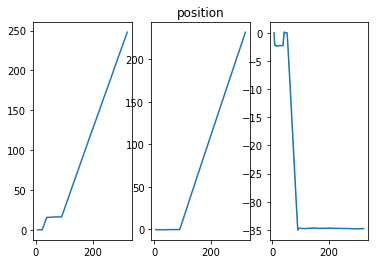

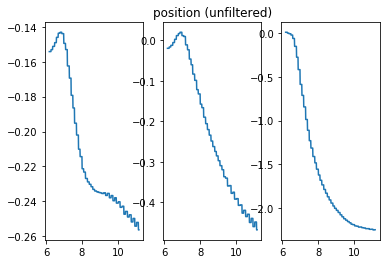

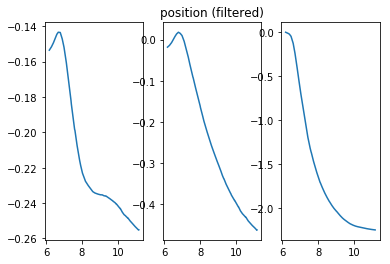

In [5]:
def moving_average(a, n=3) :
    ret = np.cumsum(a.values)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


# extracting data...
time = df_log['timestamp']/1e6  # log time is in us
x_pos = df_log['t_vehicle_local_position_0__f_x']
y_pos = df_log['t_vehicle_local_position_0__f_y']
z_pos = df_log['t_vehicle_local_position_0__f_z']


# plotting position...
fig = plt.figure()

ax = plt.subplot(1, 3, 1)
ax.plot(time, x_pos)
ax = plt.subplot(1, 3, 2)
ax.set_title('position')
ax.plot(time, y_pos)
ax = plt.subplot(1, 3, 3)
ax.plot(time, z_pos)


# plotting position (detail)...
fig = plt.figure()

n_samples = 500

ax = plt.subplot(1, 3, 1)
ax.plot(time[:n_samples], x_pos[:n_samples])
ax = plt.subplot(1, 3, 2)
ax.set_title('position (unfiltered)')
ax.plot(time[:n_samples], y_pos[:n_samples])
ax = plt.subplot(1, 3, 3)
ax.plot(time[:n_samples], z_pos[:n_samples])


# filtering...
x_pos_filtered = moving_average(x_pos, n = 20)
y_pos_filtered = moving_average(y_pos, n = 20)
z_pos_filtered = moving_average(z_pos, n = 20)


# plotting filtered position (detail)...
fig = plt.figure()

ax = plt.subplot(1, 3, 1)
ax.plot(time[:n_samples], x_pos_filtered[:n_samples])
ax = plt.subplot(1, 3, 2)
ax.set_title('position (filtered)')
ax.plot(time[:n_samples], y_pos_filtered[:n_samples])
ax = plt.subplot(1, 3, 3)
ax.plot(time[:n_samples], z_pos_filtered[:n_samples])